In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import tree

In [2]:
#Implementing the same on clustring dataset
df = pd.read_csv("clustering.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df = df.drop(columns = ["Loan_ID"])
df = df.dropna()

In [76]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
df.columns  

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.Loan_Status.value_counts()

Y    219
N     89
Name: Loan_Status, dtype: int64

In [7]:
categorical_data = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
labelencoder = LabelEncoder()

for i in categorical_data:
    df[i] = labelencoder.fit_transform(df[i])

In [8]:
x = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df["Loan_Status"]

In [9]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size =0.25 )

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [11]:
y_pred = dtc.predict(x_test)

In [12]:
accuracyScore = metrics.accuracy_score(y_test,y_pred)

In [13]:
print( "Accuracy Score for the Decision Tree : {0} ".format(accuracyScore) )

Accuracy Score for the Decision Tree : 0.7662337662337663 


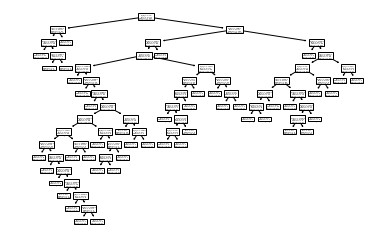

In [14]:
#Visualising the Decision Tree
from sklearn import tree
tree.plot_tree(dtc);